## **BIBLIOTECAS**

In [ ]:
#!pip install pandas_profiling --upgrade
!pip install pyjanitor
#!pip install lux-api

In [ ]:
import numpy               as np
import pandas              as pd
import matplotlib.pyplot   as plt
import matplotlib.ticker   as ticker
import seaborn             as sns
import janitor             as jn

from pandas                    import read_excel
from sklearn                   import preprocessing
from sklearn.model_selection   import train_test_split
from sklearn.ensemble          import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model      import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection   import StratifiedKFold


import warnings
warnings.filterwarnings("ignore")

## **FUNÇÕES**

In [ ]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("patient_visit_identifier", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [ ]:
def prepara_janela(rows):
    if(np.any(rows["icu"])):
        rows.loc[rows["window"]=="0-2", "icu"] = 1
    return rows.loc[rows["window"] == "0-2"]

In [ ]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

#Fonte: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/#:~:text=Find%20duplicate%20columns%20in%20a%20DataFrame,stored%20in%20duplicate%20column%20list.

In [ ]:
def cria_countplot(dados, x, hue):

  '''
  Esta função cria um countplot a partir d
  
  Parâmetros:
    cod_pergunta: string com o código da pergunta
    dados: DataFrame com os dados do arquivo "PENSE_AMOSTRA2_ALUNO.CSV"
    pergunta: string com a pergunta
 '''

  #with plt.style.context('ggplot'):
  ax = sns.countplot(data = dados, x = x, hue = hue, order = sorted(dados[x].unique()))
  ax.figure.set_size_inches(12,6)
  ax.set_title("Distribuição de frequência", fontsize=16)
  ax.set_xlabel(f"{x}", fontsize=12)
  ax.set_ylabel("Contagem")
  #sns.despine() 

  #Adicionando a legenda
  ax.legend()

  ax;

In [ ]:
def normalize_data(column):
    return (column - np.min(column)) / (np.max(column) - np.min(column))

In [ ]:
def anotacao(grafico):
    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                 textcoords = 'offset points')

In [ ]:
def colunas_correlacao(dados, limite):    
    limit = limite
    corr = dados_limpos.corr()
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
    corr_no_diag = corr.where(mask)
    coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]
    
    return coll

In [ ]:
def plota_correlacao(dados, limite):    
    limit = limite
    corr = dados_limpos.corr()
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
    corr_no_diag = corr.where(mask)
    coll = [c for c in corr_no_diag.columns if any(abs(corr_no_diag[c]) > limit)]

    plt.figure(figsize=(18,12))

    ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=False, cmap="Blues", fmt=".2f", mask=mask)

    plt.title("Correlação entre variáveis", fontsize = 16)
    plt.show()
    
    return ax

In [ ]:
def imprime_shape(dados):
    
    return print(f"O dataset agora possui {dados.shape[0]} registros e {dados.shape[1]} colunas.")

## **COLETA DOS DADOS**

In [ ]:
url = "https://github.com/claricefiorese/bootcamp_alura_projetos/blob/main/projeto_final/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true"

dados_raw = pd.read_excel(url)

In [ ]:
dados_raw = jn.clean_names(dados_raw)

## **ANÁLISE EXPLORATÓRIA DOS DADOS**

### **DADOS DISPONÍVEIS**

- Informação demográfica do paciente (03)
- Doenças pré-existentes do paciente (09)
- Resultados do exame de sangue (36)
- Sinais vitais (06)

No total, existem 54 variáveis expandidas em média, media, máximo, mínimo, *diff* e *relative diff* quando pertinente.

- *diff = max - min*
- *relative diff = diff/mediana*

In [ ]:
for coluna in dados_raw.columns:
    print(coluna)

patient_visit_identifier
age_above65
age_percentil
gender
disease_grouping_1
disease_grouping_2
disease_grouping_3
disease_grouping_4
disease_grouping_5
disease_grouping_6
htn
immunocompromised
other
albumin_median
albumin_mean
albumin_min
albumin_max
albumin_diff
be_arterial_median
be_arterial_mean
be_arterial_min
be_arterial_max
be_arterial_diff
be_venous_median
be_venous_mean
be_venous_min
be_venous_max
be_venous_diff
bic_arterial_median
bic_arterial_mean
bic_arterial_min
bic_arterial_max
bic_arterial_diff
bic_venous_median
bic_venous_mean
bic_venous_min
bic_venous_max
bic_venous_diff
billirubin_median
billirubin_mean
billirubin_min
billirubin_max
billirubin_diff
blast_median
blast_mean
blast_min
blast_max
blast_diff
calcium_median
calcium_mean
calcium_min
calcium_max
calcium_diff
creatinin_median
creatinin_mean
creatinin_min
creatinin_max
creatinin_diff
ffa_median
ffa_mean
ffa_min
ffa_max
ffa_diff
ggt_median
ggt_mean
ggt_min
ggt_max
ggt_diff
glucose_median
glucose_mean
glucose_min


In [ ]:
dados_raw.head()

,patient_visit_identifier,age_above65,age_percentil,gender,disease_grouping_1,disease_grouping_2,disease_grouping_3,disease_grouping_4,disease_grouping_5,disease_grouping_6,htn,immunocompromised,other,albumin_median,albumin_mean,albumin_min,albumin_max,albumin_diff,be_arterial_median,be_arterial_mean,be_arterial_min,be_arterial_max,be_arterial_diff,be_venous_median,be_venous_mean,be_venous_min,be_venous_max,be_venous_diff,bic_arterial_median,bic_arterial_mean,bic_arterial_min,bic_arterial_max,bic_arterial_diff,bic_venous_median,bic_venous_mean,bic_venous_min,bic_venous_max,bic_venous_diff,billirubin_median,billirubin_mean,...,dimer_max,dimer_diff,bloodpressure_diastolic_mean,bloodpressure_sistolic_mean,heart_rate_mean,respiratory_rate_mean,temperature_mean,oxygen_saturation_mean,bloodpressure_diastolic_median,bloodpressure_sistolic_median,heart_rate_median,respiratory_rate_median,temperature_median,oxygen_saturation_median,bloodpressure_diastolic_min,bloodpressure_sistolic_min,heart_rate_min,respiratory_rate_min,temperature_min,oxygen_saturation_min,bloodpressure_diastolic_max,bloodpressure_sistolic_max,heart_rate_max,respiratory_rate_max,temperature_max,oxygen_saturation_max,bloodpressure_diastolic_diff,bloodpressure_sistolic_diff,heart_rate_diff,respiratory_rate_diff,temperature_diff,oxygen_saturation_diff,bloodpressure_diastolic_diff_rel,bloodpressure_sistolic_diff_rel,heart_rate_diff_rel,respiratory_rate_diff_rel,temperature_diff_rel,oxygen_saturation_diff_rel,window,icu
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [ ]:
imprime_shape(dados_raw)

O dataset agora possui 1925 registros e 231 colunas.


In [ ]:
print(f"São fornecidos registros de {dados_raw['patient_visit_identifier'].nunique()} pacientes.")

São fornecidos registros de 385 pacientes.


In [ ]:
dados_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, patient_visit_identifier to icu
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


Para fazer a análise exploratória dos dados, apenas a janela "ABOVE_12" será utilizada, porque assim temos informação definitiva se o paciente foi para a UTI ou não.

In [ ]:
dados_eda = dados_raw.query("window=='ABOVE_12'")

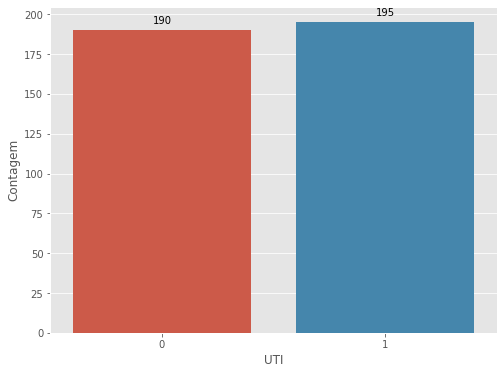

In [ ]:
plt.figure(figsize=(8,6))

with plt.style.context('ggplot'):
    ax = sns.countplot(data=dados_eda, x='icu')
    ax.set_xlabel("UTI", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

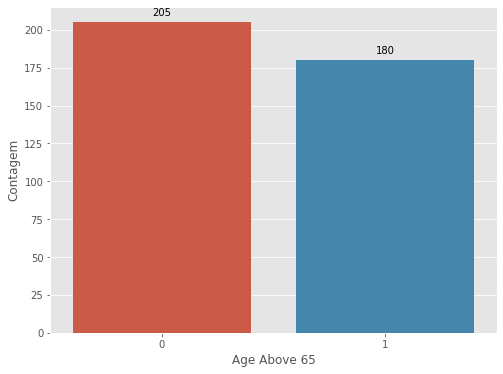

In [ ]:
plt.figure(figsize=(8,6))

with plt.style.context('ggplot'):
    ax = sns.countplot(data=dados_eda, x="age_above65")
    ax.set_xlabel("Age Above 65", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

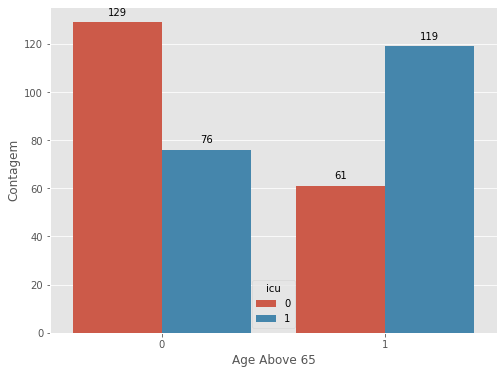

In [ ]:
plt.figure(figsize=(8,6))

with plt.style.context('ggplot'):
    ax = sns.countplot(data=dados_eda, x="age_above65", hue="icu")
    ax.set_xlabel("Age Above 65", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

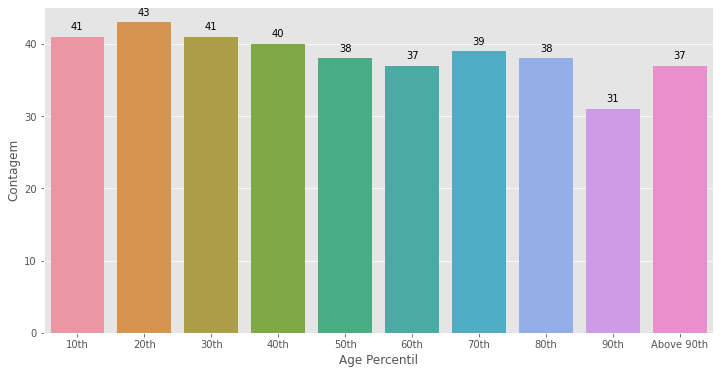

In [ ]:
plt.figure(figsize=(12,6))

with plt.style.context('ggplot'):
    ax = sns.countplot(data=dados_eda, x="age_percentil", order=sorted(dados_raw["age_percentil"].unique()))
    ax.set_xlabel("Age Percentil", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

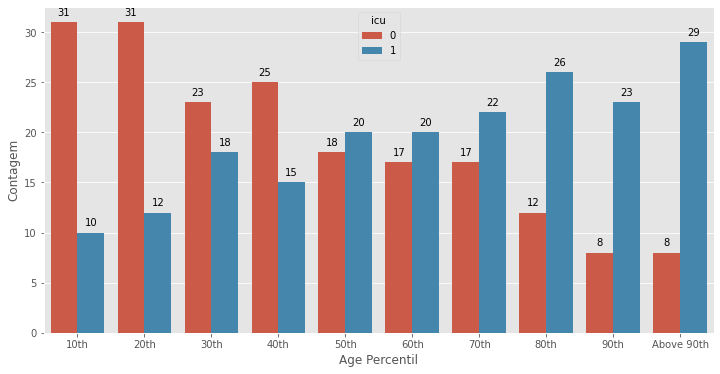

In [ ]:
plt.figure(figsize=(12,6))

with plt.style.context('ggplot'):
    ax = sns.countplot(data=dados_eda, x="age_percentil", hue="icu", order=sorted(dados_raw["age_percentil"].unique()))
    ax.set_xlabel("Age Percentil", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

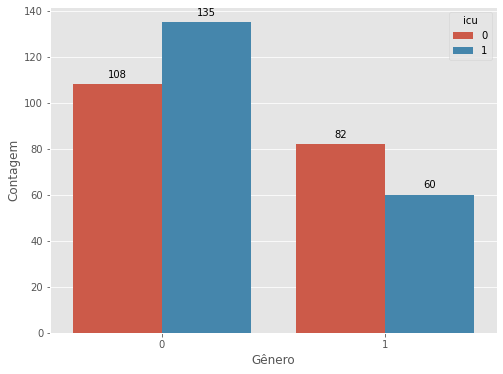

In [ ]:
plt.figure(figsize=(8,6))

with plt.style.context('ggplot'):
    ax = sns.countplot(data=dados_eda, x='gender', hue="icu")
    ax.set_xlabel("Gênero", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

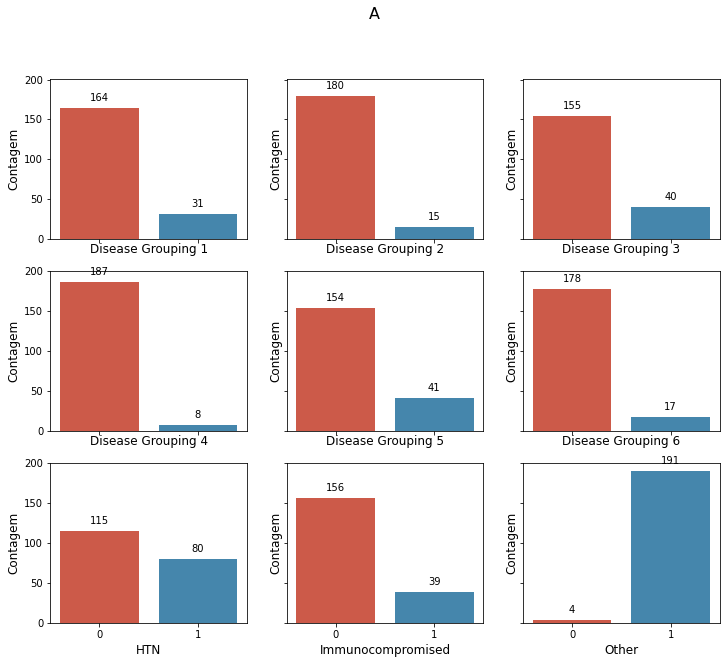

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10), sharex=True, sharey=True)

fig.suptitle("A", fontsize = 16)

with plt.style.context('ggplot'):
    
    ax = sns.countplot(ax=axes[0, 0], data=dados_eda[dados_eda["icu"] == 1], x="disease_grouping_1")
    ax.set_xlabel("Disease Grouping 1", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[0, 1], data=dados_eda[dados_eda["icu"] == 1], x="disease_grouping_2")
    ax.set_xlabel("Disease Grouping 2", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[0, 2], data=dados_eda[dados_eda["icu"] == 1], x="disease_grouping_3")
    ax.set_xlabel("Disease Grouping 3", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[1, 0], data=dados_eda[dados_eda["icu"] == 1], x="disease_grouping_4")
    ax.set_xlabel("Disease Grouping 4", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[1, 1], data=dados_eda[dados_eda["icu"] == 1], x="disease_grouping_5")
    ax.set_xlabel("Disease Grouping 5", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[1, 2], data=dados_eda[dados_eda["icu"] == 1], x="disease_grouping_6")
    ax.set_xlabel("Disease Grouping 6", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[2, 0], data=dados_eda[dados_eda["icu"] == 1], x="htn")
    ax.set_xlabel("HTN", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[2, 1], data=dados_eda[dados_eda["icu"] == 1], x="immunocompromised")
    ax.set_xlabel("Immunocompromised", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)

    ax = sns.countplot(ax=axes[2, 2], data=dados_eda[dados_eda["icu"] == 1], x="other")
    ax.set_xlabel("Other", fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    anotacao(ax)
    
    ax.set_xticklabels([0, 1])

plt.show()


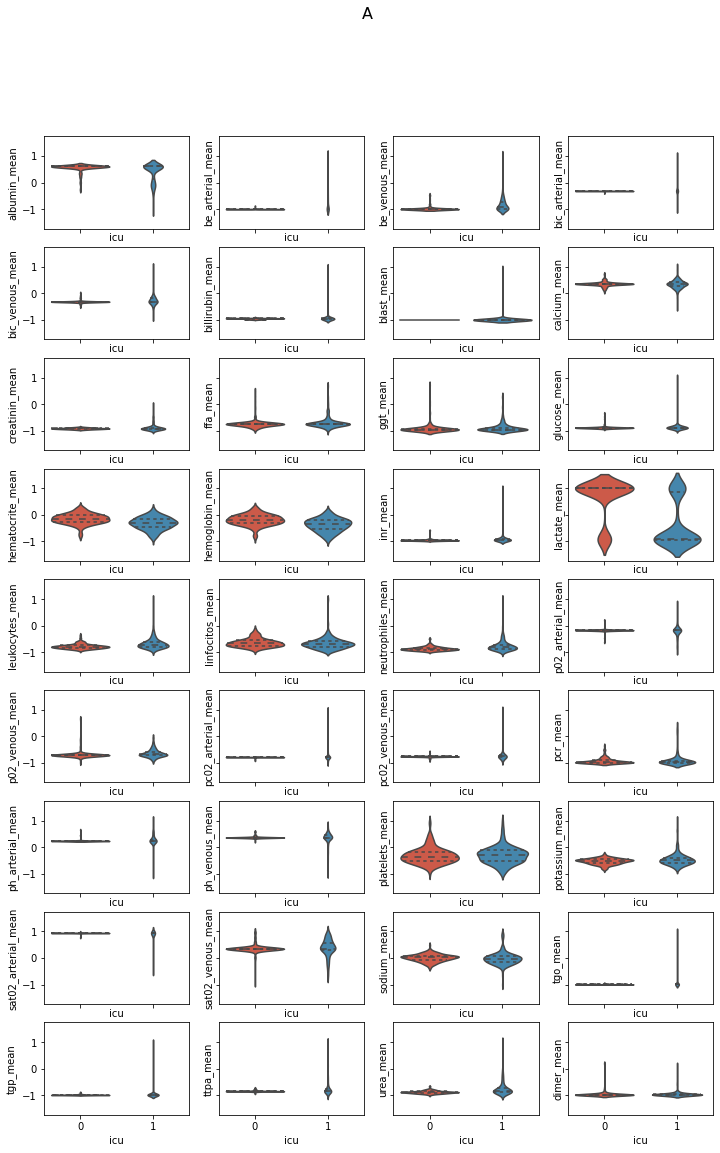

In [ ]:
fig, axes = plt.subplots(9, 4, figsize=(12, 18), sharex=True, sharey=True)

fig.suptitle("A", fontsize = 16)

with plt.style.context('ggplot'):
    
    ax = sns.violinplot(ax=axes[0, 0], x="icu", y="albumin_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[0, 1], x="icu", y="be_arterial_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[0, 2], x="icu", y="be_venous_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[0, 3], x="icu", y="bic_arterial_mean", data=dados_eda, inner="quartile")    

    ax = sns.violinplot(ax=axes[1, 0], x="icu", y="bic_venous_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[1, 1], x="icu", y="billirubin_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[1, 2], x="icu", y="blast_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[1, 3], x="icu", y="calcium_mean", data=dados_eda, inner="quartile")

    ax = sns.violinplot(ax=axes[2, 0], x="icu", y="creatinin_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[2, 1], x="icu", y="ffa_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[2, 2], x="icu", y="ggt_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[2, 3], x="icu", y="glucose_mean", data=dados_eda, inner="quartile")

    ax = sns.violinplot(ax=axes[3, 0], x="icu", y="hematocrite_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[3, 1], x="icu", y="hemoglobin_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[3, 2], x="icu", y="inr_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[3, 3], x="icu", y="lactate_mean", data=dados_eda, inner="quartile")

    ax = sns.violinplot(ax=axes[4, 0], x="icu", y="leukocytes_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[4, 1], x="icu", y="linfocitos_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[4, 2], x="icu", y="neutrophiles_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[4, 3], x="icu", y="p02_arterial_mean", data=dados_eda, inner="quartile")

    ax = sns.violinplot(ax=axes[5, 0], x="icu", y="p02_venous_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[5, 1], x="icu", y="pc02_arterial_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[5, 2], x="icu", y="pc02_venous_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[5, 3], x="icu", y="pcr_mean", data=dados_eda, inner="quartile")  

    ax = sns.violinplot(ax=axes[6, 0], x="icu", y="ph_arterial_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[6, 1], x="icu", y="ph_venous_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[6, 2], x="icu", y="platelets_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[6, 3], x="icu", y="potassium_mean", data=dados_eda, inner="quartile")

    ax = sns.violinplot(ax=axes[7, 0], x="icu", y="sat02_arterial_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[7, 1], x="icu", y="sat02_venous_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[7, 2], x="icu", y="sodium_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[7, 3], x="icu", y="tgo_mean", data=dados_eda, inner="quartile")

    ax = sns.violinplot(ax=axes[8, 0], x="icu", y="tgp_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[8, 1], x="icu", y="ttpa_mean", data=dados_eda, inner="quartile")    
    ax = sns.violinplot(ax=axes[8, 2], x="icu", y="urea_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[8, 3], x="icu", y="dimer_mean", data=dados_eda, inner="quartile")

plt.show()


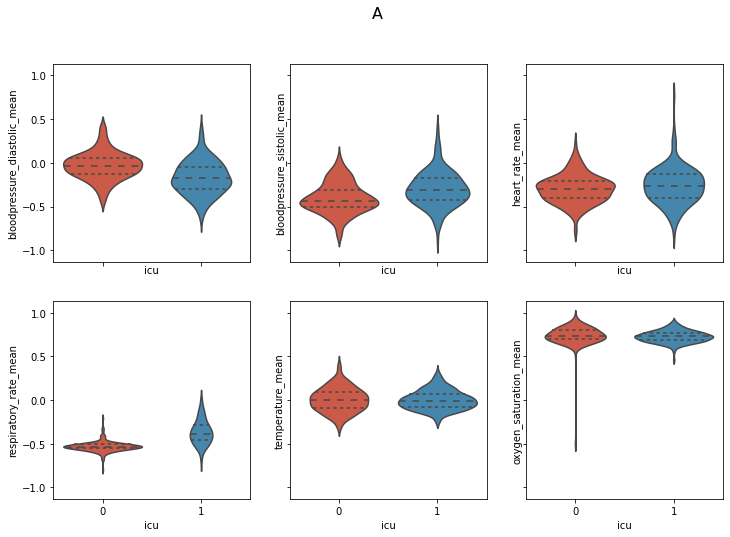

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

fig.suptitle("A", fontsize = 16)

with plt.style.context('ggplot'):
    
    ax = sns.violinplot(ax=axes[0, 0], x="icu", y="bloodpressure_diastolic_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[0, 1], x="icu", y="bloodpressure_sistolic_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[0, 2], x="icu", y="heart_rate_mean", data=dados_eda, inner="quartile")
    ax = sns.violinplot(ax=axes[1, 0], x="icu", y="respiratory_rate_mean", data=dados_eda, inner="quartile") 
    ax = sns.violinplot(ax=axes[1, 1], x="icu", y="temperature_mean", data=dados_eda, inner="quartile") 
    ax = sns.violinplot(ax=axes[1, 2], x="icu", y="oxygen_saturation_mean", data=dados_eda, inner="quartile") 

## **PRÉ-PROCESSAMENTO DOS DADOS**

### **DADOS DE PACIENTES QUE FORAM ADMITIDOS NA UTI NA PRIMEIRA JANELA DE TEMPO (0-2)**

Conforme as diretrizes do Hospital Sírio Libanês, os dados de pacientes que foram admitidos na UTI na primeira janela de tempo (0-2) não devem ser considerados nas análises.
<br>Para simplificar, esses dados serão desconsiderados desde o primeiro momento.

In [ ]:
dados_primeira_janela_uti = dados_raw.query("window=='0-2' and icu==1")["patient_visit_identifier"].values
dados_usaveis = dados_raw.query("patient_visit_identifier not in @dados_primeira_janela_uti")
print(f"Desconsiderando os dados de pacientes que entraram na UTI na primeira janela de tempo (0-2), são {dados_usaveis.shape[0]} registros e {dados_usaveis.shape[1]} colunas.")

Desconsiderando os dados de pacientes que entraram na UTI na primeira janela de tempo (0-2), são 1765 registros e 231 colunas.


### **DADOS FALTANTES**

In [ ]:
for coluna in dados_raw.columns:
    print(f"{coluna}: {round(dados_raw[coluna].isnull().mean() * 100,2)}%")

patient_visit_identifier: 0.0%
age_above65: 0.0%
age_percentil: 0.0%
gender: 0.0%
disease_grouping_1: 0.26%
disease_grouping_2: 0.26%
disease_grouping_3: 0.26%
disease_grouping_4: 0.26%
disease_grouping_5: 0.26%
disease_grouping_6: 0.26%
htn: 0.26%
immunocompromised: 0.26%
other: 0.26%
albumin_median: 57.35%
albumin_mean: 57.35%
albumin_min: 57.35%
albumin_max: 57.35%
albumin_diff: 57.35%
be_arterial_median: 57.35%
be_arterial_mean: 57.35%
be_arterial_min: 57.35%
be_arterial_max: 57.35%
be_arterial_diff: 57.35%
be_venous_median: 57.35%
be_venous_mean: 57.35%
be_venous_min: 57.35%
be_venous_max: 57.35%
be_venous_diff: 57.35%
bic_arterial_median: 57.35%
bic_arterial_mean: 57.35%
bic_arterial_min: 57.35%
bic_arterial_max: 57.35%
bic_arterial_diff: 57.35%
bic_venous_median: 57.35%
bic_venous_mean: 57.35%
bic_venous_min: 57.35%
bic_venous_max: 57.35%
bic_venous_diff: 57.35%
billirubin_median: 57.35%
billirubin_mean: 57.35%
billirubin_min: 57.35%
billirubin_max: 57.35%
billirubin_diff: 57.35

A equipe do Hospital Sírio Libanês sugere a melhor maneira de lidar com os valores faltantes:

>É razoável presumir que um paciente que não tem uma medição registrada em uma determinada janela de tempo esteja clinicamente estável, podendo apresentar sinais vitais e exames de sangue semelhantes às janelas vizinhas. Portanto, pode-se preencher os valores faltantes usando os valores da janela anterior ou posterior. Atenção aos problemas de multicolinearidade e variância zero nesses dados ao escolher seu algoritmo.

In [ ]:
print(f"O dataset possui {round(100*dados_usaveis.isna().to_numpy().sum()/(dados_usaveis.shape[0]*dados_usaveis.shape[1]), 2)}% de valores faltantes.\n")

print(f"Número de colunas que possuem valores faltantes: {len(dados_usaveis.columns[dados_usaveis.isna().any()])}")

print(f"\nNúmero de colunas que não possuem valores faltantes: {len(dados_usaveis.columns[dados_usaveis.notna().all()])}")


O dataset possui 51.19% de valores faltantes.

Número de colunas que possuem valores faltantes: 225

Número de colunas que não possuem valores faltantes: 6


explicar como funciona a função de preencher a tabela

In [ ]:
dados_sem_nan = preenche_tabela(dados_usaveis)
dados_sem_nan.head()

,patient_visit_identifier,age_above65,age_percentil,gender,disease_grouping_1,disease_grouping_2,disease_grouping_3,disease_grouping_4,disease_grouping_5,disease_grouping_6,htn,immunocompromised,other,albumin_median,albumin_mean,albumin_min,albumin_max,albumin_diff,be_arterial_median,be_arterial_mean,be_arterial_min,be_arterial_max,be_arterial_diff,be_venous_median,be_venous_mean,be_venous_min,be_venous_max,be_venous_diff,bic_arterial_median,bic_arterial_mean,bic_arterial_min,bic_arterial_max,bic_arterial_diff,bic_venous_median,bic_venous_mean,bic_venous_min,bic_venous_max,bic_venous_diff,billirubin_median,billirubin_mean,...,dimer_max,dimer_diff,bloodpressure_diastolic_mean,bloodpressure_sistolic_mean,heart_rate_mean,respiratory_rate_mean,temperature_mean,oxygen_saturation_mean,bloodpressure_diastolic_median,bloodpressure_sistolic_median,heart_rate_median,respiratory_rate_median,temperature_median,oxygen_saturation_median,bloodpressure_diastolic_min,bloodpressure_sistolic_min,heart_rate_min,respiratory_rate_min,temperature_min,oxygen_saturation_min,bloodpressure_diastolic_max,bloodpressure_sistolic_max,heart_rate_max,respiratory_rate_max,temperature_max,oxygen_saturation_max,bloodpressure_diastolic_diff,bloodpressure_sistolic_diff,heart_rate_diff,respiratory_rate_diff,temperature_diff,oxygen_saturation_diff,bloodpressure_diastolic_diff_rel,bloodpressure_sistolic_diff_rel,heart_rate_diff_rel,respiratory_rate_diff_rel,temperature_diff_rel,oxygen_saturation_diff_rel,window,icu
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,-0.283951,-0.376923,-0.188679,-0.379310,-0.107143,0.736842,-0.340206,-0.4875,-0.572650,-0.857143,0.318681,0.898990,-0.076923,0.286486,0.298507,0.272727,-0.275362,0.736842,-0.33913,0.325153,0.114504,0.176471,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,-0.283951,-0.376923,-0.188679,-0.379310,-0.107143,0.736842,-0.340206,-0.4875,-0.572650,-0.857143,0.318681,0.898990,-0.076923,0.286486,0.298507,0.27272

In [ ]:
dados_sem_nan[dados_sem_nan.isna().any(axis=1)]

,patient_visit_identifier,age_above65,age_percentil,gender,disease_grouping_1,disease_grouping_2,disease_grouping_3,disease_grouping_4,disease_grouping_5,disease_grouping_6,htn,immunocompromised,other,albumin_median,albumin_mean,albumin_min,albumin_max,albumin_diff,be_arterial_median,be_arterial_mean,be_arterial_min,be_arterial_max,be_arterial_diff,be_venous_median,be_venous_mean,be_venous_min,be_venous_max,be_venous_diff,bic_arterial_median,bic_arterial_mean,bic_arterial_min,bic_arterial_max,bic_arterial_diff,bic_venous_median,bic_venous_mean,bic_venous_min,bic_venous_max,bic_venous_diff,billirubin_median,billirubin_mean,...,dimer_max,dimer_diff,bloodpressure_diastolic_mean,bloodpressure_sistolic_mean,heart_rate_mean,respiratory_rate_mean,temperature_mean,oxygen_saturation_mean,bloodpressure_diastolic_median,bloodpressure_sistolic_median,heart_rate_median,respiratory_rate_median,temperature_median,oxygen_saturation_median,bloodpressure_diastolic_min,bloodpressure_sistolic_min,heart_rate_min,respiratory_rate_min,temperature_min,oxygen_saturation_min,bloodpressure_diastolic_max,bloodpressure_sistolic_max,heart_rate_max,respiratory_rate_max,temperature_max,oxygen_saturation_max,bloodpressure_diastolic_diff,bloodpressure_sistolic_diff,heart_rate_diff,respiratory_rate_diff,temperature_diff,oxygen_saturation_diff,bloodpressure_diastolic_diff_rel,bloodpressure_sistolic_diff_rel,heart_rate_diff_rel,respiratory_rate_diff_rel,temperature_diff_rel,oxygen_saturation_diff_rel,window,icu
995,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,...,-0.978029,-1.0,0.100944,-0.355656,-0.012209,-0.577268,0.07563,0.653251,0.08642,-0.384615,0.056604,-0.517241,0.107143,0.684211,-0.175258,-0.25,-0.213675,-0.571429,0.252747,0.818182,-0.076923,-0.351351,-0.134328,-0.515152,0.130435,0.736842,-0.478261,-0.631902,-0.648855,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-0.817204,-0.599662,-0.918403,0-2,0
996,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,...,-0.978029,-1.0,0.100944,-0.355656,-0.012209,-0.577268,0.07563,0.653251,0.08642,-0.384615,0.056604,-0.517241,0.107143,0.684211,-0.175258,-0.25,-0.213675,-0.571429,0.252747,0.818182,-0.076923,-0.351351,-0.134328,-0.515152,0.130435,0.736842,-0.478261,-0.631902,-0.648855,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-0.817204,-0.599662,-0.918403,2-4,0
997,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,...,-0.978029,-1.0,0.100944,-0.355656,-0.012209,-0.577268,0.07563,0.653251,0.08642,-0.384615,0.056604,-0.517241,0.107143,0.684211,-0.175258,-0.25,-0.213675,-0.571429,0.252747,0.818182,-0.076923,-0.351351,-0.134328,-0.515152,0.130435,0.736842,-0.478261,-0.631902,-0.648855,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-0.817204,-0.599662,-0.918403,4-6,0
998,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.93895,-0.93895,...,-0.978029,-1.0,0.100944,-0.355656,-0.012209,-0.577268,0.07563,0.653251,0.08642,-0.384615,0.056604,-0.517241,0.107143,0.684211,-0.175258,-0.25,-0.213675,-0.571429,0.252747,0.818182,-0.076923,-0.351351,-0.134328,-0.515152,0.130435,0.736842,-0.478261,-0.631902,-0.648855,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-0.817204,-0.599662,-0.918403,6-12,0
999,199,0,10th,0,Na

Como os dados faltantes correspondem a um único paciente, esse paciente será excluído da análise.

In [ ]:
dados_sem_nan = dados_sem_nan.dropna()
imprime_shape(dados_sem_nan)

O dataset agora possui 1760 registros e 231 colunas.


### **SELEÇÃO DA JANELA DE TEMPO**

O ideal para o hospital é que já nas primeiras horas seja possível identificar se o paciente vai ou não para a UTI.
<br>Segundo a equipe do Hospital Sírio Libanês:
>Ainda que um modelo preditivo usando todas as janelas de tempo provavelmente resulte em uma maior acurácia, um bom modelo usando apenas a primeira janela (0-2) provavelmente será mais relevante clinicamente.

explicar como funciona a função de preparar a tabela

In [ ]:
dados_limpos = dados_sem_nan.groupby("patient_visit_identifier").apply(prepara_janela)

Como a janela de tempo é a mesma para todos os pacientes, a coluna "window" não será relevante para o treinamento dos modelos de Machine Learning e será excluída do dataset.

In [ ]:
dados_limpos = dados_limpos.drop(["window"], axis=1)

O número identificador do paciente também não é relevante para os modelos de Machine Learning e será utilizado com índice.

In [ ]:
dados_limpos.set_index("patient_visit_identifier", inplace=True)

In [ ]:
imprime_shape(dados_limpos)

O dataset agora possui 352 registros e 229 colunas.


### **TRANSFORMAÇÃO DA COLUNA AGE_PERCENTIL**

In [ ]:
dados_limpos["age_percentil"]

patient_visit_identifier
0            60th
2            10th
3            40th
4            10th
5            10th
          ...    
380          40th
381    Above 90th
382          50th
383          40th
384          50th
Name: age_percentil, Length: 352, dtype: object

In [ ]:
dados_limpos["age_percentil"] = dados_limpos["age_percentil"].str.replace(r'\D', '').astype("int64")

In [ ]:
dados_limpos["age_percentil"] = normalize_data(dados_limpos["age_percentil"])

In [ ]:
dados_limpos["age_percentil"]

patient_visit_identifier
0      0.625
2      0.000
3      0.375
4      0.000
5      0.000
       ...  
380    0.375
381    1.000
382    0.500
383    0.375
384    0.500
Name: age_percentil, Length: 352, dtype: float64

In [ ]:
imprime_shape(dados_limpos)

O dataset agora possui 352 registros e 229 colunas.


## **SELEÇÃO DE ATRIBUTOS**

### **ATRIBUTOS COM VALORES ÚNICOS**

As colunas com valores únicos serão excluídas do dataset por não serem relevantes para diferenciar os pacientes que foram admitidos ou não na UTI.

In [ ]:
for coluna in dados_limpos.columns:
    if len(dados_limpos[coluna].unique()) == 1:
      print(coluna)
      dados_limpos.drop(coluna,inplace=True,axis=1)

albumin_diff
be_arterial_diff
be_venous_diff
bic_arterial_diff
bic_venous_diff
billirubin_diff
blast_diff
calcium_diff
creatinin_diff
ffa_diff
ggt_diff
glucose_diff
hematocrite_diff
hemoglobin_diff
inr_diff
lactate_diff
leukocytes_diff
linfocitos_diff
neutrophiles_diff
p02_arterial_diff
p02_venous_diff
pc02_arterial_diff
pc02_venous_diff
pcr_diff
ph_arterial_diff
ph_venous_diff
platelets_diff
potassium_diff
sat02_arterial_diff
sat02_venous_diff
sodium_diff
tgo_diff
tgp_diff
ttpa_diff
urea_diff
dimer_diff


### **ATRIBUTOS COM VALORES IDÊNTICOS**

In [ ]:
colunas_valores_identicos = getDuplicateColumns(dados_limpos)
dados_limpos = dados_limpos.drop(colunas_valores_identicos, axis=1)

### **Pearson Correlation**

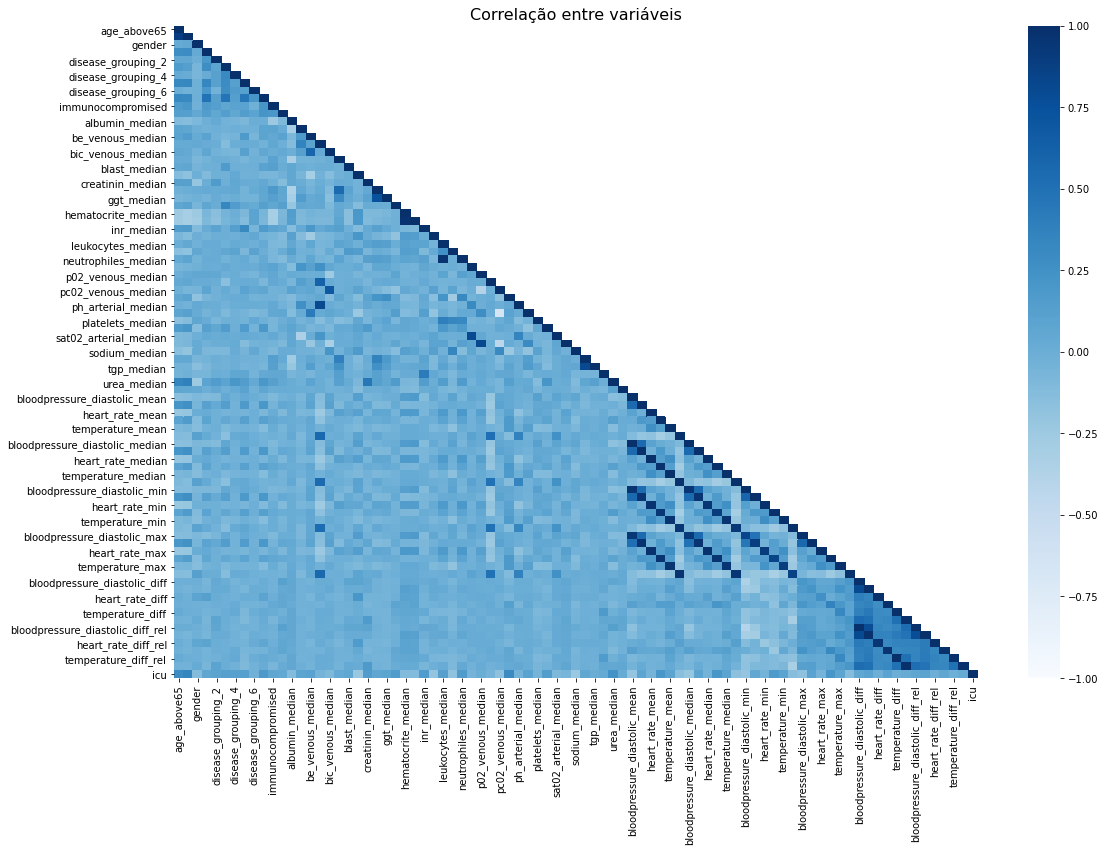

In [ ]:
colunas_colineares = colunas_correlacao(dados_limpos, 0.95) 
dados_sem_correlacao = dados_limpos.drop(colunas_colineares, axis=1)
plota_correlacao(dados_sem_correlacao, 0.95)

In [ ]:
imprime_shape(dados_sem_correlacao)

O dataset agora possui 352 registros e 62 colunas.


### **LOGISTIC REGRESSION**

In [ ]:
x_columns = dados_sem_correlacao.columns
y = dados_sem_correlacao["icu"]
x = dados_sem_correlacao[x_columns].drop(["icu"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

### **Feature Importance**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
coefs = np.abs(lr.coef_[0])

In [ ]:
dados_fi_lr = pd.DataFrame({"feature_names": x_train.columns, "feature_importance": coefs})
colunas_fi_lr = dados_fi_lr.feature_names
dados_fi_lr.sort_values(by=["feature_importance"], ascending=False, inplace=True)

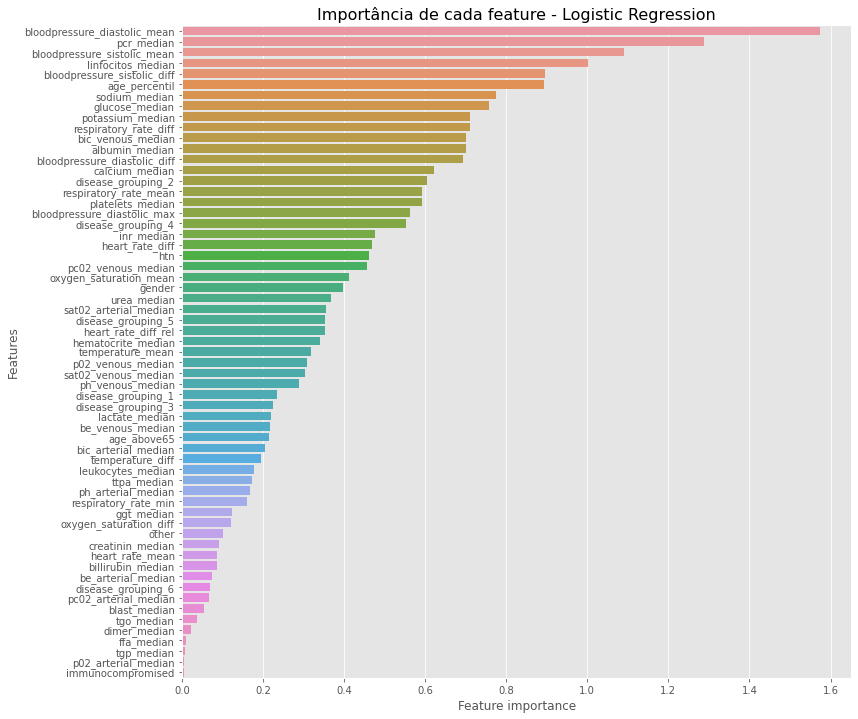

In [ ]:
plt.figure(figsize=(12,12))

with plt.style.context('ggplot'):
  sns.barplot(x=dados_fi_lr["feature_importance"], y=dados_fi_lr["feature_names"])
  plt.title("Importância de cada feature - Logistic Regression", fontsize=16)
  plt.xlabel ("Feature importance", fontsize=12)
  plt.ylabel ("Features", fontsize=12)

plt.show()

### **Recursive feature elimination**

In [ ]:
lr = LogisticRegression()
rfe_lr = RFE(estimator=lr, step=1)
rfe_lr.fit(x,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [ ]:
print ("Número ideal de features:", rfe_lr.n_features_)

Número ideal de features: 30


In [ ]:
dados_rfe_lr = pd.DataFrame({"feature_names": x.columns, "bool": rfe_lr.support_})
colunas_rfe_lr = dados_rfe_lr.query("bool == True").feature_names.values
list(colunas_rfe_lr)

['age_percentil',
 'gender',
 'disease_grouping_1',
 'disease_grouping_2',
 'disease_grouping_4',
 'htn',
 'albumin_median',
 'be_venous_median',
 'bic_venous_median',
 'blast_median',
 'calcium_median',
 'creatinin_median',
 'glucose_median',
 'inr_median',
 'leukocytes_median',
 'linfocitos_median',
 'pc02_venous_median',
 'pcr_median',
 'potassium_median',
 'sat02_arterial_median',
 'sodium_median',
 'bloodpressure_diastolic_mean',
 'bloodpressure_sistolic_mean',
 'respiratory_rate_mean',
 'oxygen_saturation_mean',
 'bloodpressure_diastolic_max',
 'bloodpressure_diastolic_diff',
 'bloodpressure_sistolic_diff',
 'respiratory_rate_diff',
 'temperature_diff']

### **Recursive feature elimination with cross-validation**

In [ ]:
lr = LogisticRegression()
rfecv_lr = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring="roc_auc")
rfecv_lr.fit(x,y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=0)

In [ ]:
print ("Número ideal de features:", rfecv_lr.n_features_)
46, 0.811), xycoords="data", xytext=(35, 0.74

Número ideal de features: 44


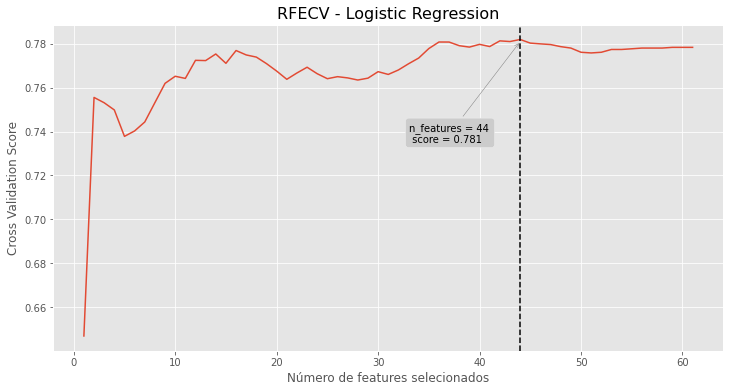

In [ ]:
plt.figure(figsize=(12,6))

with plt.style.context('ggplot'):

  ax = sns.lineplot(range(1, 62), rfecv_lr.grid_scores_) 
  ax.axvline(44, c="k", ls="--")
  bbox = dict(boxstyle ="round", fc ="0.8")
  ax.annotate(s="n_features = 44 \n score = 0.781", xy=(44, 0.781), xycoords="data", xytext=(33, 0.735),
              bbox=dict(boxstyle ="round", fc ="0.8"), arrowprops=dict(arrowstyle="->", color="gray"))
  ax.set_xlabel("Número de features selecionados", fontsize=12) 
  ax.set_ylabel("Cross Validation Score", fontsize=12) 
  ax.set_title("RFECV - Logistic Regression", fontsize=16)

plt.show()

### **RANDOM FOREST CLASSIFIER**

### **Feature Importance**

O *feature_importance_* irá retornar um array onde cada elemento dele é uma feature do seu modelo. Ele irá dizer, em proporções, quão importante aquela feature é para o modelo, onde quanto maior o valor, mais importante a feature é para o modelo.

In [ ]:
rfc = RandomForestClassifier(random_state=1458)
rfc.fit(x_train, y_train)
importances = rfc.feature_importances_

In [ ]:
print ("Número ideal de atributos:", rfc.n_features_)

Número ideal de atributos: 61


In [ ]:
dados_fi_rfc = pd.DataFrame({"feature_names": x_train.columns, "feature_importance": importances})
colunas_fi_rfc = dados_fi_rfc.feature_names
dados_fi_rfc.sort_values(by=["feature_importance"], ascending=False,inplace=True)

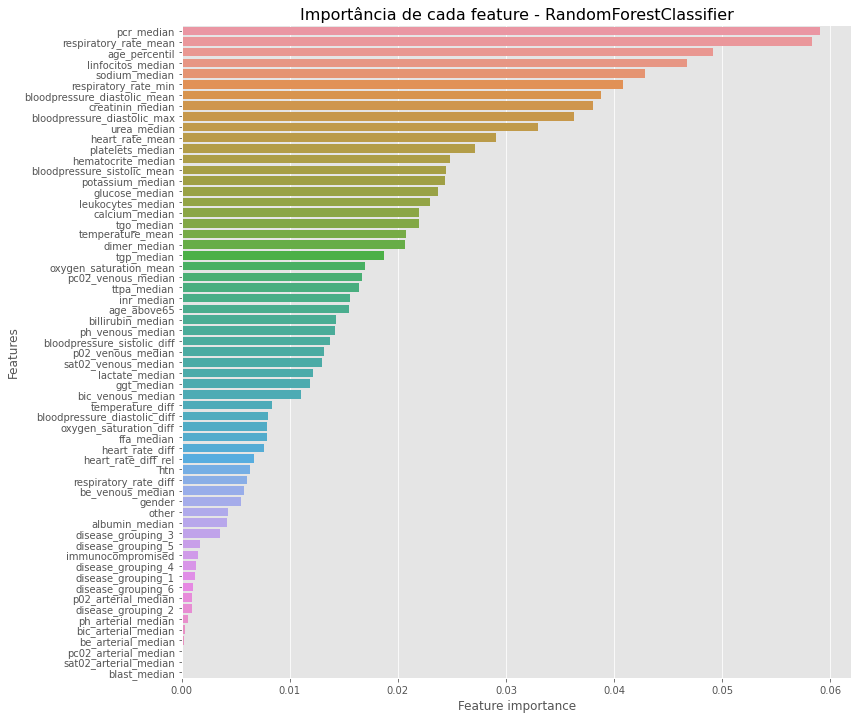

In [ ]:
plt.figure(figsize=(12,12))

with plt.style.context('ggplot'):
  sns.barplot(x=dados_fi_rfc["feature_importance"], y=dados_fi_rfc["feature_names"])
  plt.title("Importância de cada feature - RandomForestClassifier", fontsize=16)
  plt.xlabel ("Feature importance", fontsize=12)
  plt.ylabel ("Features", fontsize=12)

plt.show()

#Fonte: https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

### **Recursive feature elimination**

Assim como seu nome diz — Recursive Feature Elimination — , o RFE funciona da seguinte forma: ele irá treinar seu modelo utilizando todo seu conjunto inicial, com todas as features e data points que vierem nele. Após o primeiro treino, o RFE irá verificar a importâncias das features — utilizando atributos como *coef_* ou *feature_importances_* — e, recursivamente, irá remover as features menos importantes do dataset e treinar o modelo novamente. Ele fará isso até chegar a um número ideal de features.

In [ ]:
rfc = RandomForestClassifier(random_state=1458)
rfe_rfc = RFE(estimator=rfc, step=1)
rfe_rfc.fit(x,y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=1458,
                                     verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [ ]:
print ("Número ideal de features:", rfe_rfc.n_features_)

Número ideal de features: 30


In [ ]:
dados_rfe_rfc = pd.DataFrame({"feature_names": x.columns, "bool": rfe_rfc.support_})
colunas_rfe_rfc = dados_rfe_rfc.query("bool == True").feature_names.values
list(colunas_rfe_rfc)

['age_percentil',
 'billirubin_median',
 'calcium_median',
 'creatinin_median',
 'ggt_median',
 'glucose_median',
 'hematocrite_median',
 'inr_median',
 'lactate_median',
 'leukocytes_median',
 'linfocitos_median',
 'p02_venous_median',
 'pc02_venous_median',
 'pcr_median',
 'platelets_median',
 'potassium_median',
 'sat02_venous_median',
 'sodium_median',
 'tgo_median',
 'tgp_median',
 'urea_median',
 'dimer_median',
 'bloodpressure_diastolic_mean',
 'bloodpressure_sistolic_mean',
 'heart_rate_mean',
 'respiratory_rate_mean',
 'temperature_mean',
 'oxygen_saturation_mean',
 'respiratory_rate_min',
 'bloodpressure_diastolic_max']

### **Recursive feature elimination with cross-validation**

In [ ]:
rfc = RandomForestClassifier(random_state=1458)
rfecv_rfc = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring="roc_auc")
rfecv_rfc.fit(x,y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=1458,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=0)

In [ ]:
print ("Número ideal de features:", rfecv_rfc.n_features_)

Número ideal de features: 46


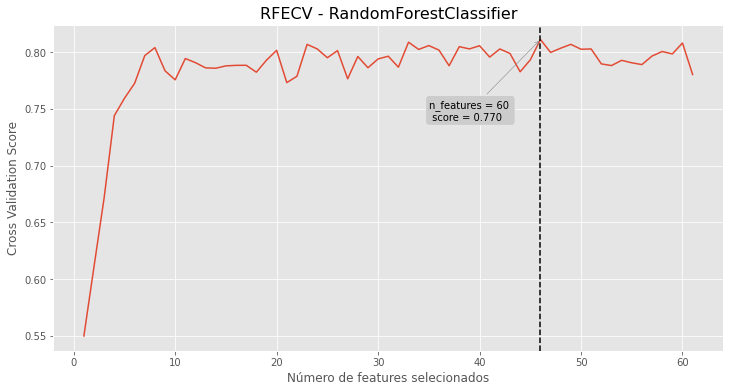

In [ ]:
plt.figure(figsize=(12,6))

with plt.style.context('ggplot'):

  ax = sns.lineplot(range(1, 62), rfecv_rfc.grid_scores_) 
  ax.axvline(46, c="k", ls="--")
  bbox = dict(boxstyle ="round", fc ="0.8")
  ax.annotate(s="n_features = 60 \n score = 0.811", xy=(46, 0.811), xycoords="data", xytext=(35, 0.74),
              bbox=dict(boxstyle ="round", fc ="0.8"), arrowprops=dict(arrowstyle="->", color="gray"))
  ax.set_xlabel("Número de features selecionados", fontsize=12) 
  ax.set_ylabel("Cross Validation Score", fontsize=12) 
  ax.set_title("RFECV - RandomForestClassifier", fontsize=16)

plt.show()

In [ ]:
dados_rfecv_rfc = pd.DataFrame({"feature_names": x.columns, "bool": rfecv_rfc.support_})
colunas_rfecv_rfc = dados_rfecv_rfc.query("bool == True").feature_names.values
list(colunas_rfecv_rfc)

['age_above65',
 'age_percentil',
 'gender',
 'htn',
 'albumin_median',
 'be_venous_median',
 'bic_venous_median',
 'billirubin_median',
 'calcium_median',
 'creatinin_median',
 'ffa_median',
 'ggt_median',
 'glucose_median',
 'hematocrite_median',
 'inr_median',
 'lactate_median',
 'leukocytes_median',
 'linfocitos_median',
 'p02_venous_median',
 'pc02_venous_median',
 'pcr_median',
 'ph_venous_median',
 'platelets_median',
 'potassium_median',
 'sat02_venous_median',
 'sodium_median',
 'tgo_median',
 'tgp_median',
 'ttpa_median',
 'urea_median',
 'dimer_median',
 'bloodpressure_diastolic_mean',
 'bloodpressure_sistolic_mean',
 'heart_rate_mean',
 'respiratory_rate_mean',
 'temperature_mean',
 'oxygen_saturation_mean',
 'respiratory_rate_min',
 'bloodpressure_diastolic_max',
 'bloodpressure_diastolic_diff',
 'bloodpressure_sistolic_diff',
 'heart_rate_diff',
 'respiratory_rate_diff',
 'temperature_diff',
 'oxygen_saturation_diff',
 'heart_rate_diff_rel']